In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("cleaned_abc_company_data.csv")  


df = df.drop(columns=["Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], errors='ignore')


np.random.seed(42)  
df["Height"] = np.random.randint(150, 181, size=len(df))


df = df.drop_duplicates()


df.info()
df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_4608\3578624327.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=team_distribution_df["Team"], x=team_distribution_df["Percentage"], palette="viridis")


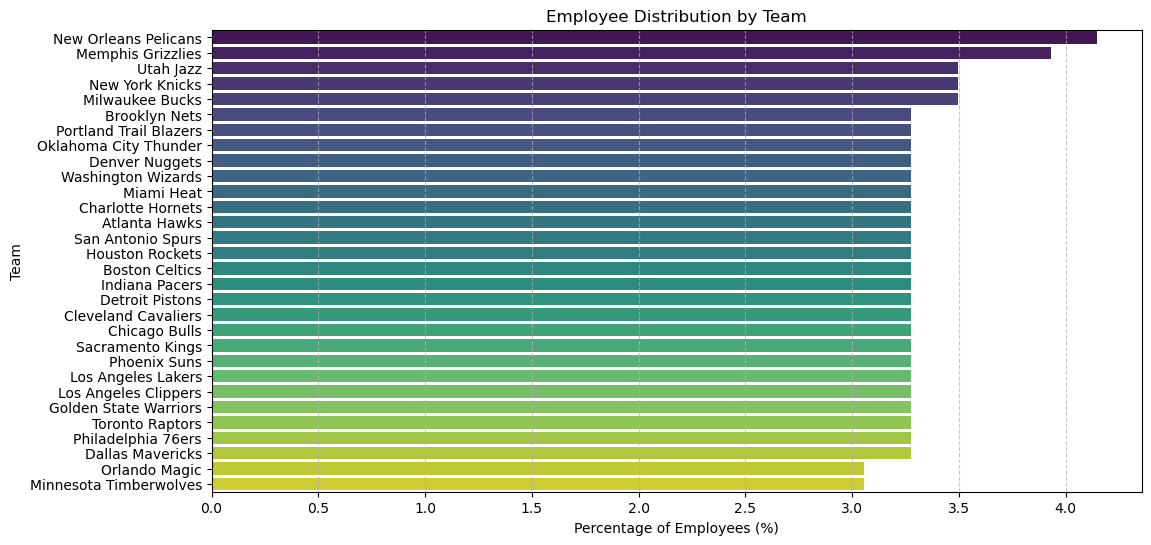

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


team_distribution = df["Team"].value_counts(normalize=True) * 100


team_distribution_df = team_distribution.reset_index()
team_distribution_df.columns = ["Team", "Percentage"]


plt.figure(figsize=(12, 6))
sns.barplot(y=team_distribution_df["Team"], x=team_distribution_df["Percentage"], palette="viridis")

plt.xlabel("Percentage of Employees (%)")
plt.ylabel("Team")
plt.title("Employee Distribution by Team")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4608\2371133950.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_distribution.index, y=position_distribution.values, palette="coolwarm")


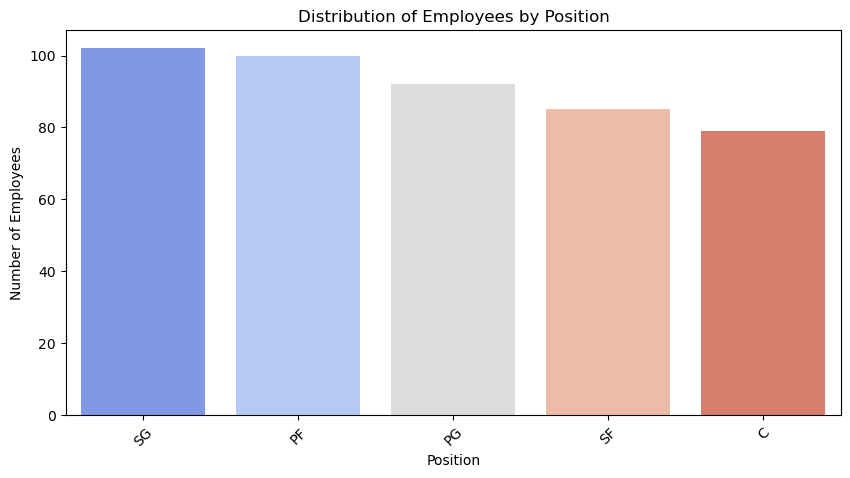

In [38]:
position_distribution = df["Position"].value_counts()


plt.figure(figsize=(10, 5))
sns.barplot(x=position_distribution.index, y=position_distribution.values, palette="coolwarm")

plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employees by Position")
plt.xticks(rotation=45)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4608\2942421220.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="magma")


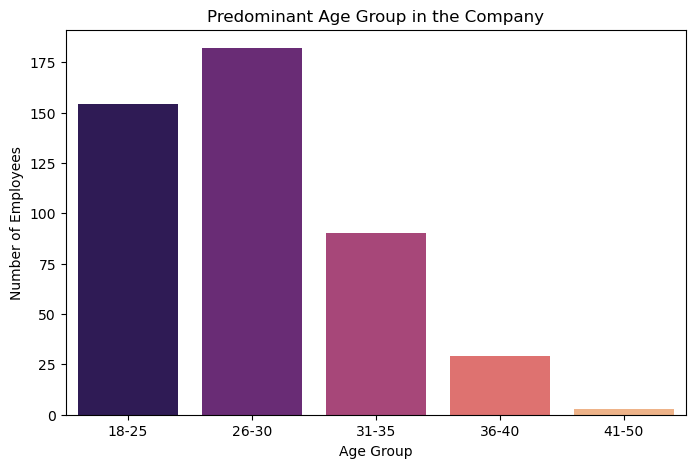

In [40]:

bins = [18, 25, 30, 35, 40, 50]
labels = ["18-25", "26-30", "31-35", "36-40", "41-50"]


df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)


age_group_distribution = df["Age Group"].value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="magma")

plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.title("Predominant Age Group in the Company")
plt.show()


In [42]:

team_salary = df.groupby("Team")["Salary"].sum().reset_index().sort_values(by="Salary", ascending=False)


position_salary = df.groupby("Position")["Salary"].sum().reset_index().sort_values(by="Salary", ascending=False)

print("Team with Highest Salary Expenditure:\n", team_salary.head(1))
print("\nPosition with Highest Salary Expenditure:\n", position_salary.head(1))


Team with Highest Salary Expenditure:
                   Team     Salary
5  Cleveland Cavaliers  109824875

Position with Highest Salary Expenditure:
   Position     Salary
0        C  466377332


In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Age"], y=df["Salary"], alpha=0.6)

plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary")
plt.show()


correlation = df["Age"].corr(df["Salary"])
print(f"Correlation between Age and Salary: {correlation:.2f}")
